# Verify_DataFile_Changes
## Notebook based on GPS_Cadance_Compare with elements from other repos' codes 

In [2]:
import sys
import matplotlib
if 'matplotlib.pyplot' not in sys.modules.keys():
    matplotlib.use("Agg")
import matplotlib.pyplot as plt
import json
import numpy as np
import pickle 

%matplotlib notebook

def get_pickles(path, file_name, tref="Reg", version="Original", DeltInx=[100, 300, 200], params=None):
    import pickle
    pklfname = path+"%sTime-ParsedData_wDInx%sto%s-%s-%s.pkl" % (tref.capitalize(), DeltInx[0], DeltInx[1], file_name.partition(".")[0], version)
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params]

def get_115kpickles(path, file_name, tref="Reg", DeltInx=[100, 300, 200], params=None):
    import pickle
    pklfname = path+"%sTime-ParsedData_wDInx%sto%s-%s.pkl" % (tref.capitalize(), DeltInx[0], DeltInx[1], file_name.partition(".")[0])
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params] 
    
def get_newpickles(path, file_name, tref="Reg", version="Original", params=None):
    import pickle
    pklfname = path+"%sTime_ParsedData_wDInx%sto%s-%s-%s.pkl" % (tref.capitalize(), file_name.partition(".")[0], version)
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params]

def get_new115kpickles(path, file_name, tref="Reg", params=None):
    import pickle
    pklfname = path+"%sTime_ParsedData-%s.pkl" % (tref.capitalize(), file_name.partition(".")[0])
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params] 

<IPython.core.display.Javascript object>


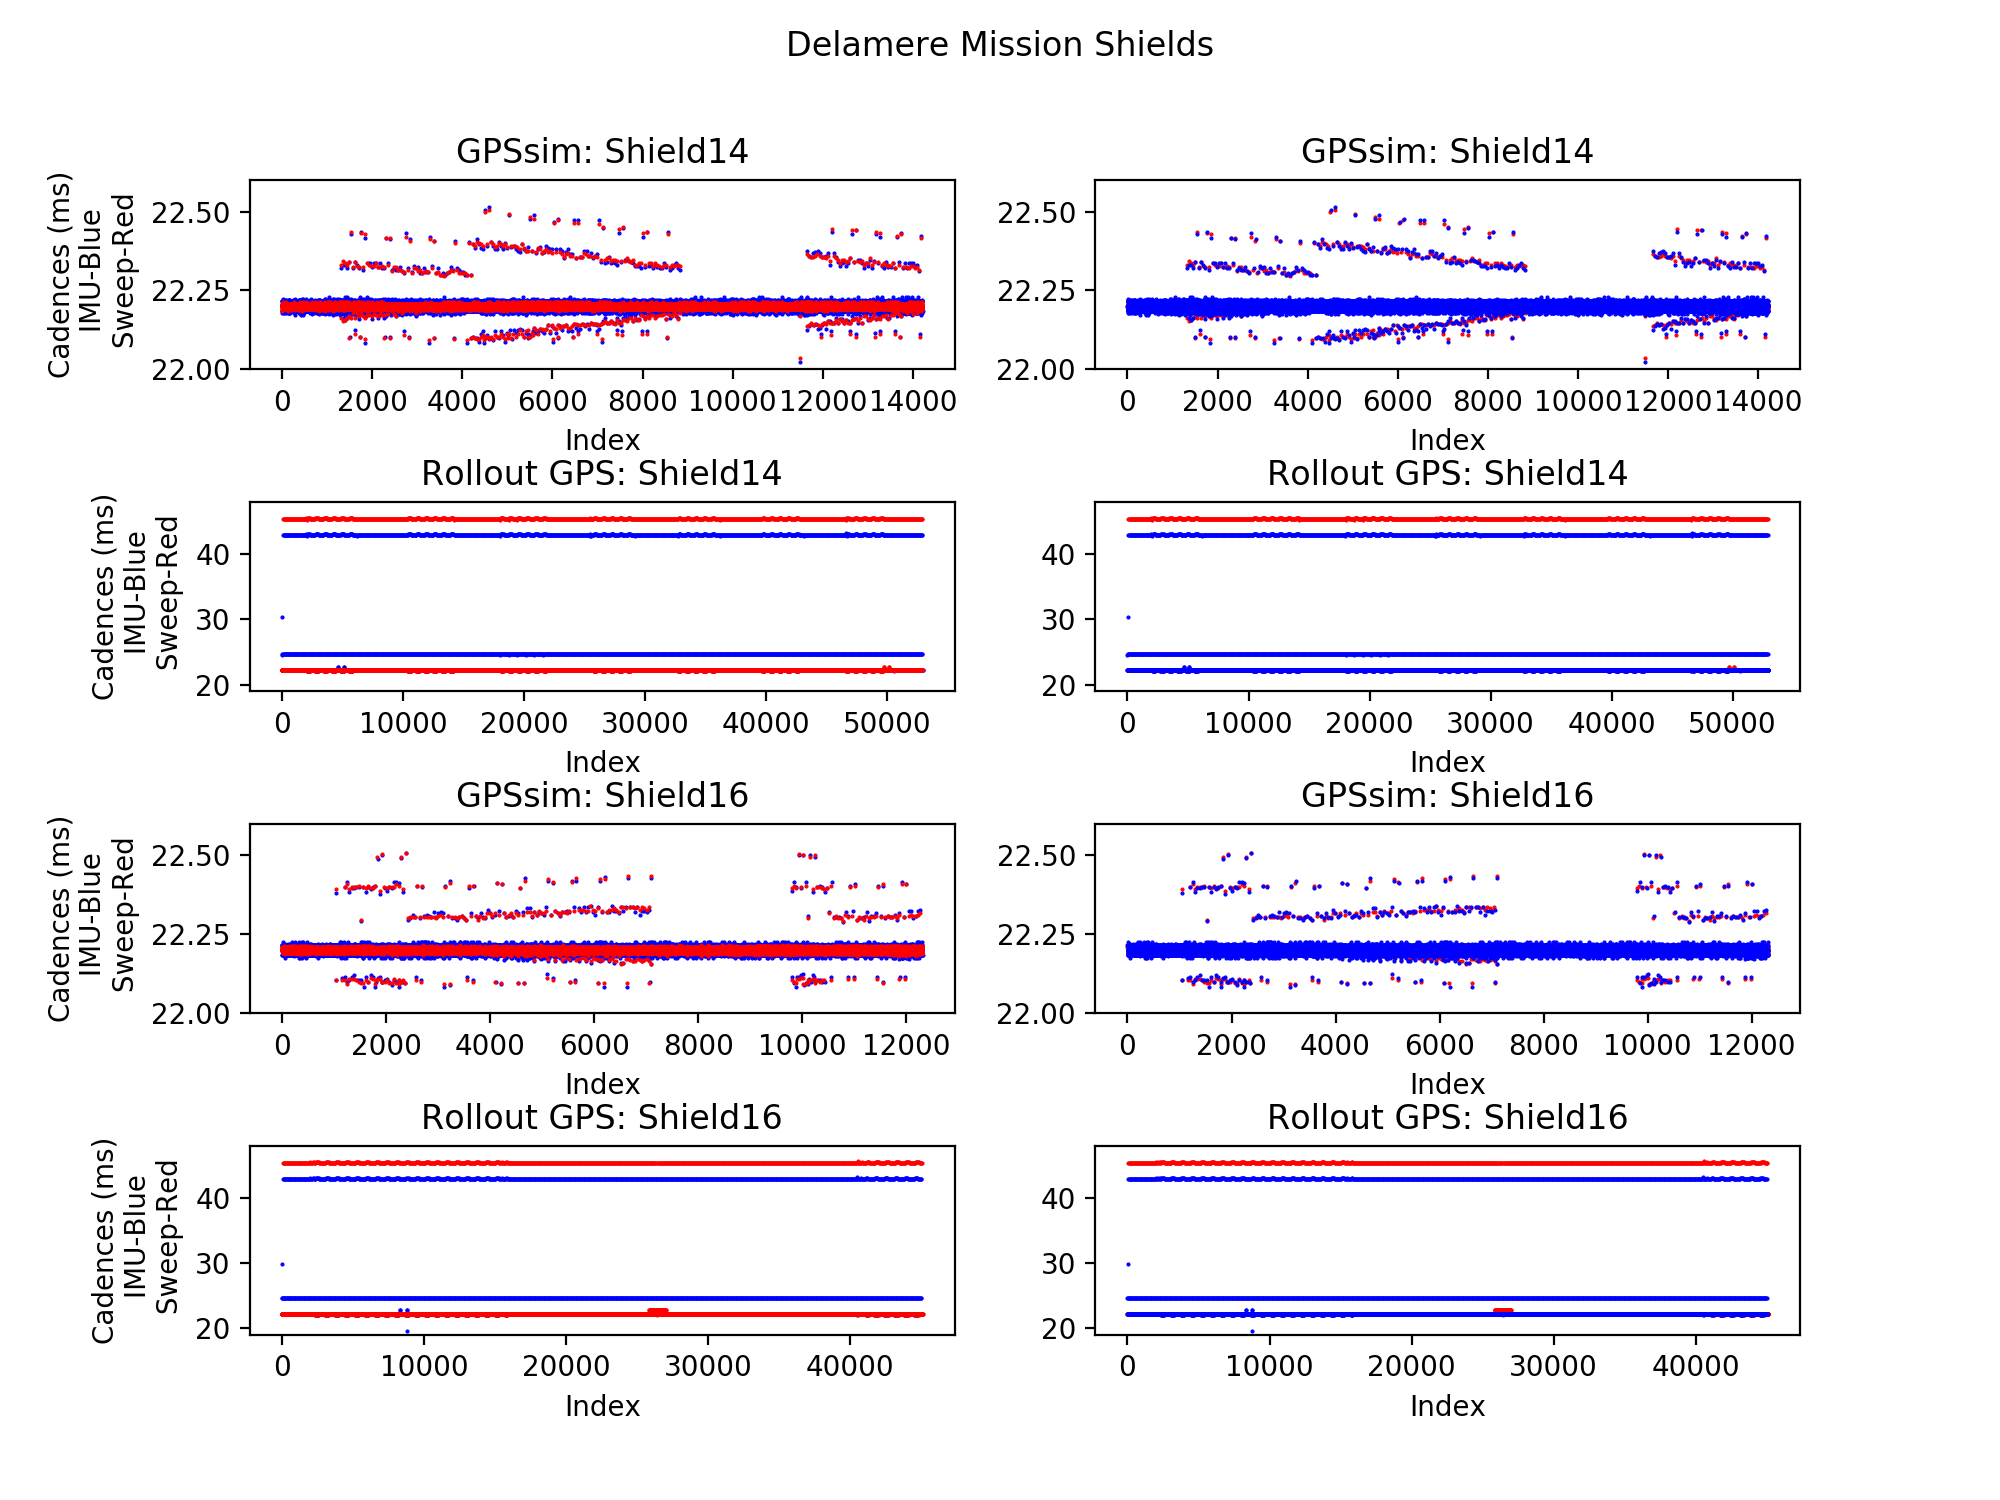

0: 1 Done
0: 2 Done
1: 1 Done
1: 2 Done
2: 1 Done
2: 2 Done
3: 1 Done
3: 2 Done


In [41]:
matplotlib.use('nbagg')
import matplotlib.cm as cm
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.io import savemat, loadmat
from __future__ import division

mission = 'Delamere'
ver = "Original"

path_lst = ["./Pre-Shipment Bob Tests/"]*2
file_lst = ["data_file_230k-Shield14_Bob-02_09_21.txt", "data_file_230k-Shield16_Bob-02_09_21.txt"]
gps_type = ['GPSsim']*2
path_lst.extend(["./wallops_intDel/20210401_GPS_Rollout-Dallas/"]*2)
file_lst.extend(["Dallas1_R4_GPSRollout_4-1-2021.txt", "Dallas4_R4_GPSRollout_4-1-2021.txt"] )
gps_type.extend(['Rollout GPS']*2)

path_lst = ["./Pre-Shipment Bob Tests/", "./wallops_intDel/20210401_GPS_Rollout-Dallas/"]*2
file_lst = ["data_file_230k-Shield14_Bob-02_09_21.txt", "Dallas1_R4_GPSRollout_4-1-2021.txt", \
           "data_file_230k-Shield16_Bob-02_09_21.txt", "Dallas4_R4_GPSRollout_4-1-2021.txt"]
gps_type = ['GPSsim', 'Rollout GPS']*2

dots = True

gs_left = plt.GridSpec(len(file_lst), 2,  hspace=0.7)

# Set up dots or not more cleanly
line_style = '-'
if dots:
    line_style = '.'

markersize = 1
#Y-Axes' Limits
ylims_lst = [None]*len(file_lst)
ylims_lst = [[22,22.6]]*2 #, [21,23]]
ylims_lst.extend([[19, 48]]*2) #, [19, 49]])
#2nd plot config
ylims_lst = [[22,22.6], [19, 48]]*2

xlims = None
# xlims = [5000, 5200] #Zoom in to see just a few GPS interupts

fig = plt.figure(figsize=(10, 7.5))

inx = 0
for path, file_name, ylims, gps_str in zip(path_lst, file_lst, ylims_lst, gps_type):
    imuPlot, sweepPlot, shieldID = get_pickles(path, file_name, tref='Reg', version=ver, params=['imuTime', 'sweepTime', 'shieldID'])

    # Cadence (sweep on top)
    axis2 = fig.add_subplot(gs_left[inx,0])
    plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
    plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
    plt.ylim(ylims)
    plt.xlim(xlims)
    plt.ylabel("Cadences (ms)\n IMU-Blue\n Sweep-Red")
    plt.xlabel("Index")
    plt.title('%s: Shield%s' % (gps_str, shieldID))
    print ("%s: 1 Done" % (inx))

    # Cadence (imu on top)
    fig.add_subplot(gs_left[inx,1], sharex=axis2, sharey=axis2)
    plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
    plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
    plt.ylim(ylims)
    plt.title('%s: Shield%s' % (gps_str, shieldID))
    plt.xlim(xlims)
    plt.xlabel("Index")
    print ("%s: 2 Done" % (inx))
    
    inx = inx + 1

fig.suptitle('%s Mission Shields' % (mission))
plt.show()

<IPython.core.display.Javascript object>


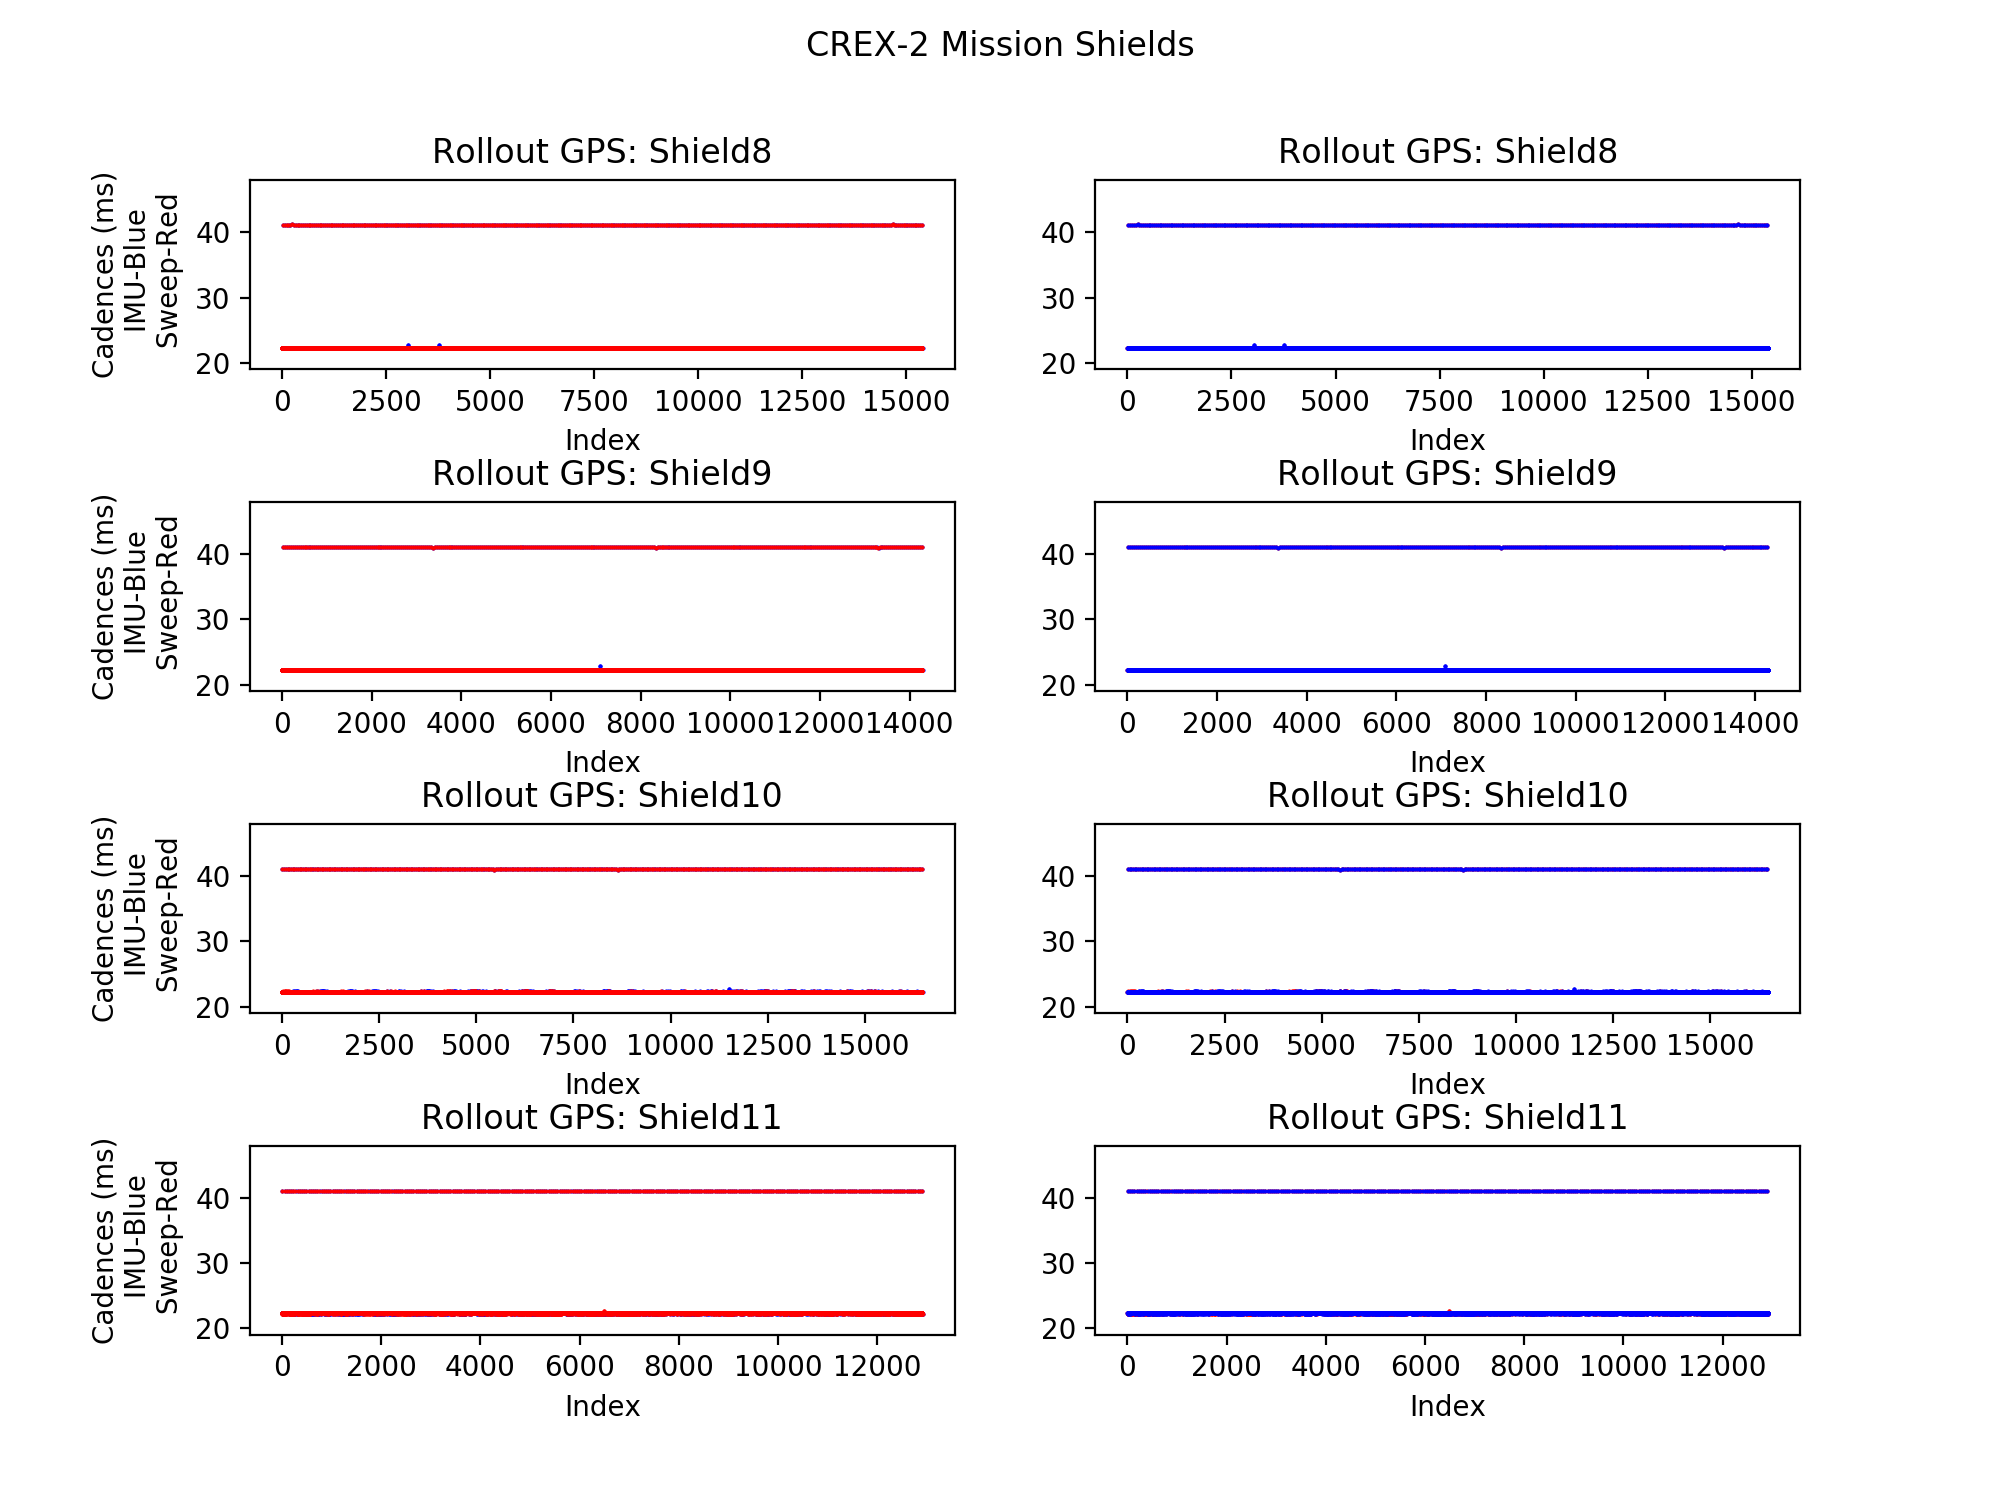

0: 1 Done
0: 2 Done
1: 1 Done
1: 2 Done
2: 1 Done
2: 2 Done
3: 1 Done
3: 2 Done


In [8]:
matplotlib.use('nbagg')
import matplotlib.cm as cm
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.io import savemat, loadmat
from __future__ import division

mission = 'CREX-2'
fname_fmt = "data_file_115k_usbserial-FT5RIYEN%s-20210827_gps_rollout.txt"
path_lst = ["./crex2_int/day10/"]*4
file_lst = [fname_fmt % (num) for num in [1, 2, 0, 3]]
gps_type = ['Rollout GPS']*4

dots = True

gs_left = plt.GridSpec(len(file_lst), 2,  hspace=0.7)

# Set up dots or not more cleanly
line_style = '-'
if dots:
    line_style = '.'

markersize = 1
#Y-Axes' Limits
ylims_lst = [None]*len(file_lst)
# ylims_lst = [[22,22.6]]*2 #, [21,23]]
# ylims_lst.extend([[19, 48]]*2) #, [19, 49]])
# #2nd plot config
# ylims_lst = [[22,22.6], [19, 48]]*2
ylims_lst = [[19, 48]]*4

xlims = None
# xlims = [5000, 5200] #Zoom in to see just a few GPS interupts

fig = plt.figure(figsize=(10, 7.5))

inx = 0
for path, file_name, ylims, gps_str in zip(path_lst, file_lst, ylims_lst, gps_type):
    imuPlot, sweepPlot, shieldID = get_115kpickles(path, file_name, tref="Reg", params=['imuTime', 'sweepTime', 'shieldID'])

    # Cadence (sweep on top)
    axis2 = fig.add_subplot(gs_left[inx,0])
    plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
    plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
    plt.ylim(ylims)
    plt.xlim(xlims)
    plt.ylabel("Cadences (ms)\n IMU-Blue\n Sweep-Red")
    plt.xlabel("Index")
    plt.title('%s: Shield%s' % (gps_str, shieldID))
    print ("%s: 1 Done" % (inx))

    # Cadence (imu on top)
    fig.add_subplot(gs_left[inx,1], sharex=axis2, sharey=axis2)
    plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
    plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
    plt.ylim(ylims)
    plt.title('%s: Shield%s' % (gps_str, shieldID))
    plt.xlim(xlims)
    plt.xlabel("Index")
    print ("%s: 2 Done" % (inx))
    
    inx = inx + 1

fig.suptitle('%s Mission Shields' % (mission))
plt.show()